# SHACL for CGMES using pyshacl

In [1]:
from rdflib import Graph
from pyshacl import validate
from glob import glob
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdfpandas.graph import to_dataframe
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
from wiki_script import *

## Simple Example

In [3]:
# Person Example
persons_data_graph = parse_folder_to_single_graph("example_person\data", "rdf")
persons_shapes_graph = parse_folder_to_single_graph("example_person\shapes", "rdf")

Parsing 1 rdf files
Parsing example_person\data\persons.rdf
Parsing 1 rdf files
Parsing example_person\shapes\person_shapes.rdf


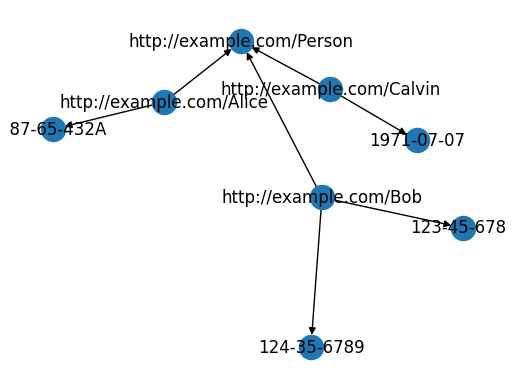

In [4]:
plot_graph(persons_data_graph)

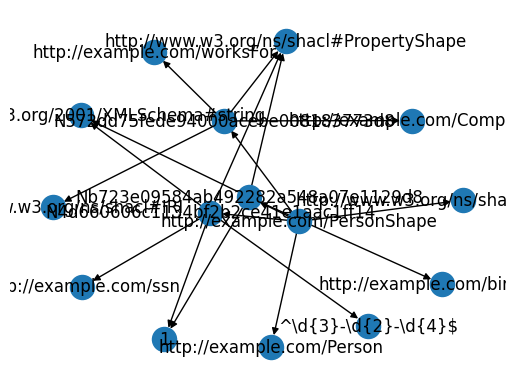

In [5]:
plot_graph(persons_shapes_graph)

In [6]:
persons_data_df = to_dataframe(persons_data_graph)
persons_data_df

,ex:ssn{Literal}[0],ex:ssn{Literal}[1],rdf:type{URIRef},ex:birthDate{Literal}(xsd:date)
ex:Alice,987-65-432A,NaN,ex:Person,NaN
ex:Bob,123-45-6789,124-35-6789,ex:Person,NaN
ex:Calvin,NaN,NaN,ex:Person,1971-07-07


In [7]:
persons_shapes_df = to_dataframe(persons_shapes_graph)
persons_shapes_df

,rdf:type{URIRef},sh:datatype{URIRef},sh:maxCount{Literal}(xsd:integer),sh:path{URIRef},sh:pattern{Literal},sh:class{URIRef},sh:nodeKind{URIRef},sh:property{BNode}[0],sh:property{BNode}[1],sh:property{BNode}[2],sh:targetClass{URIRef}
N4d660606c1134bf2b2ce41e1aac1ff14,sh:PropertyShape,xsd:string,1,ex:ssn,^\d{3}-\d{2}-\d{4}$,NaN,NaN,NaN,NaN,NaN,NaN
N572dd75fede94000acebe008183773d8,sh:PropertyShape,NaN,NaN,ex:worksFor,NaN,ex:Company,sh:IRI,NaN,NaN,NaN,NaN
Nb723e09584ab492282a548a07e1129d8,sh:PropertyShape,xsd:string,1,ex:birthDate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ex:PersonShape,sh:NodeShape,NaN,NaN,NaN,NaN,NaN,NaN,N4d660606c1134bf2b2ce41e1aac1ff14,N572dd75fede94000acebe008183773d8,Nb723e09584ab492282a548a07e1129d8,ex:Person


Search shapes for one attribute by using a keyword search:

In [8]:
# Search social security number and drop NaN columns
data = search_df_word(dataframe=persons_shapes_df, keyword="ssn")
data = drop_nan_cols(data)
print(f"{data.shape}")
data

(1, 5)


,rdf:type{URIRef},sh:datatype{URIRef},sh:maxCount{Literal}(xsd:integer),sh:path{URIRef},sh:pattern{Literal}
N4d660606c1134bf2b2ce41e1aac1ff14,sh:PropertyShape,xsd:string,1,ex:ssn,^\d{3}-\d{2}-\d{4}$


In [9]:
r = validate(data_graph=persons_data_graph, shacl_graph=persons_shapes_graph)
person_conforms, person_results_graph, person_results_text = r
print(person_results_text)

Validation Report
Conforms: False
Results (3):
Constraint Violation in MaxCountConstraintComponent (http://www.w3.org/ns/shacl#MaxCountConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ rdf:type sh:PropertyShape ; sh:datatype xsd:string ; sh:maxCount Literal("1", datatype=xsd:integer) ; sh:path ex:ssn ; sh:pattern Literal("^\d{3}-\d{2}-\d{4}$") ]
	Focus Node: ex:Bob
	Result Path: ex:ssn
	Message: More than 1 values on ex:Bob->ex:ssn
Constraint Violation in PatternConstraintComponent (http://www.w3.org/ns/shacl#PatternConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ rdf:type sh:PropertyShape ; sh:datatype xsd:string ; sh:maxCount Literal("1", datatype=xsd:integer) ; sh:path ex:ssn ; sh:pattern Literal("^\d{3}-\d{2}-\d{4}$") ]
	Focus Node: ex:Alice
	Value Node: Literal("987-65-432A")
	Result Path: ex:ssn
	Message: Value does not match pattern '^\d{3}-\d{2}-\d{4}$'
Constraint Violation in DatatypeConstraintComponent (http://www.w3.org/ns/shacl#DatatypeConstraintC

### Explanation (w3.org) 
1. Severity:
    The value is equal to the value of sh:severity of the shape in the shapes graph that caused the result, defaulting to sh:Violation if no sh:severity has been specified for the shape.

1. Source Shape: 		
Validation results may include, as the only value of the property sh:sourceShape, the shape that the given sh:focusNode was validated against.


1. Focus Node:
Each validation result has exactly one value for the property sh:focusNode that is equal to the focus node that has caused the result. This is the focus node that was validated when the validation result was produced.

1. Value Node
    * For node shapes the value nodes are the individual focus nodes, forming a set with exactly one member.
    * For property shapes with a value for sh:path p the value nodes are the set of nodes in the data graph that can be reached from the focus node with the path mapping of p. Unless stated otherwise, the value of sh:resultPath of each validation result is a SHACL property path that represents an equivalent path to the one provided in the shape.


1. Result Path:
Validation results may have a value for the property sh:resultPath pointing at a well-formed SHACL property path. For results produced by a property shape, this SHACL property path is equivalent to the value of sh:path of the shape, unless stated otherwise.


1. Message:
Validation results may have values for the property sh:resultMessage, for example to communicate additional textual details to humans. While sh:resultMessage may have multiple values, there should not be two values with the same language tag. These values are produced by a validation engine based on the values of sh:message of the constraints in the shapes graph, see Declaring Messages for a Shape. In cases where a constraint does not have any values for sh:message in the shapes graph the SHACL processor may automatically generate other values for sh:resultMessage.


## CGMES Example

First load the data. Show the table in OneNote.

In [10]:
# Load data
cgmes_data_graph = parse_folder_to_single_graph("cgmes_threedotzero", "xml")
cgmes_shapes_graph = parse_folder_to_single_graph("SHACL", "rdf")

cgmes_conforms, cgmes_results_graph, cgmes_results_text = validate(data_graph=cgmes_data_graph, shacl_graph=cgmes_shapes_graph)

cgmes_data_df = to_dataframe(cgmes_data_graph)
cgmes_shapes_df = to_dataframe(cgmes_shapes_graph)
cgmes_results_df = to_dataframe(cgmes_results_graph)

Parsing 1 xml files
Parsing cgmes_threedotzero\equipment.xml
Parsing 75 rdf files
Parsing SHACL\Common\IdentifiedObjecStringLength.rdf
Parsing SHACL\CrossProfileValueType\DL_453_cp_explicit.rdf
Parsing SHACL\CrossProfileValueType\DL_453_cp_implicit.rdf
Parsing SHACL\CrossProfileValueType\DY_457_cp_explicit.rdf
Parsing SHACL\CrossProfileValueType\DY_457_cp_implicit.rdf
Parsing SHACL\CrossProfileValueType\GL_13_cp_explicit.rdf
Parsing SHACL\CrossProfileValueType\GL_13_cp_implicit.rdf
Parsing SHACL\CrossProfileValueType\OP_452_cp_explicit.rdf
Parsing SHACL\CrossProfileValueType\OP_452_cp_implicit.rdf
Parsing SHACL\CrossProfileValueType\SC_452_cp.rdf
Parsing SHACL\CrossProfileValueType\SV_456_cp_explicit.rdf
Parsing SHACL\CrossProfileValueType\SV_456_cp_implicit.rdf
Parsing SHACL\CrossProfileValueType\TP_456_cp_explicit.rdf
Parsing SHACL\CrossProfileValueType\TP_456_cp_implicit.rdf
Parsing SHACL\IEC61968-13\GL_13.rdf
Parsing SHACL\IEC61970-301UML\DL_301UML.rdf
Parsing SHACL\IEC61970-301UML

In [11]:
print(f"{cgmes_shapes_df.shape=}")
cgmes_shapes_df.head()

cgmes_shapes_df.shape=(14237, 465)


,rdf:type{URIRef},sh:description{Literal},sh:group{URIRef},sh:maxCount{Literal}(xsd:integer),sh:message{Literal}[0],sh:message{Literal}[1],sh:minCount{Literal}(xsd:integer),sh:name{Literal},sh:order{Literal}(xsd:integer),sh:order{Literal}(xsd:decimal),...,sh:xone{BNode},sh:inversePath{URIRef},sh:maxInclusive{Literal}(xsd:float),sh:maxLength{Literal}(xsd:integer),sh:minLength{Literal}(xsd:integer),sh:and{BNode},sh:hasValue{Literal}(xsd:anyURI),rdfs:subClassOf{URIRef},sh:not{BNode},sh:deactivated{Literal}(xsd:boolean)
N00159fb9574b4f3eb32c168c5f2c5ff2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N001ca29fb4554ebb93c5bba97bcff301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N00235c6601284b228353d1b06c269d5e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N0028f0d42daf45c0bfdd6029f1caacd0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N0038d92c4d4943b88828272c78616c89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3 types of severity:

In [12]:
cgmes_shapes_df["sh:severity{URIRef}"].value_counts()

sh:severity{URIRef}
sh:Violation    8658
sh:Warning        20
sh:Info            7
Name: count, dtype: int64

## Descriptions and Messages in CGMES SHACL shapes

After specifying a cim object and the shacl item, these cells will filter the shapes dataframe and display the distinct values and counts.

In [13]:
cim_objects = ["voltagelevel", "bay", "substation", "busbarsection"]
columns_dict = {"message": 'sh:message{Literal}[0]', 'description':'sh:description{Literal}'}

In [14]:
test_item = "description"
object = cim_objects[1]

data = search_df_word(dataframe=cgmes_shapes_df, keyword=object)
data = drop_nan_rows_with_keyword(data, test_item)
data = drop_nan_cols(data)
print(f"Looking at {test_item} for {object}:\nSize of dataframe is {data.shape}")
display(data.head())
value_counts = column_value_counts(data, columns_dict[test_item])
print(f"Unique {test_item}s for {object}:")
value_counts

Looking at description for bay:
Size of dataframe is (15, 13)


,rdf:type{URIRef},sh:description{Literal},sh:group{URIRef},sh:maxCount{Literal}(xsd:integer),sh:message{Literal}[0],sh:minCount{Literal}(xsd:integer),sh:name{Literal},sh:order{Literal}(xsd:integer),sh:path{URIRef},sh:path{BNode},sh:severity{URIRef},sh:nodeKind{URIRef},sh:in{BNode}
eq452:AuxiliaryEquipment-containment,sh:PropertyShape,"For AuxilaryEquipment (CurrentTransformer, Pot...",eq452:EQ452containment,1,The containment is either missing or it is not...,1,C:452:EQ:AuxilaryEquipment:containment,0,NaN,N91c75c42c84647e99cd07362abd6b17f,sh:Violation,NaN,N631380e46322436e8a7e9c940d337e5f
eq452:BusbarSection-containment,sh:PropertyShape,For BusbarSection the association Equipment.Eq...,eq452:EQ452containment,1,The containment is either missing or it is not...,1,C:452:EQ:BusbarSection:containment,7,NaN,Nbd84527d134d47618cac6cb2a7247d60,sh:Violation,NaN,N24031e6a53a9442ebb561d87fe472018
eq452:Clamp-containment,sh:PropertyShape,For Clamp the association Equipment.EquipmentC...,eq452:EQ452containment,1,The containment is either missing or it is not...,1,C:452:EQ:Clamp:containment,15,NaN,N20e19535b8d64ebfa5df0027a5538493,sh:Violation,NaN,Nbdd252cb3699429eb2a5336aac02f101
eq452:Cut-containment,sh:PropertyShape,For Cut the association Equipment.EquipmentCon...,eq452:EQ452containment,1,The containment is either missing or it is not...,1,C:452:EQ:Cut:containment,14,NaN,Nd0c5f759170244389d9e580a22c44b14,sh:Violation,NaN,Na51f74bf22cf436ba43421d3fc0aeb8f
eq452:Disconnector-containment,sh:PropertyShape,For Disconnector the association Equipment.Equ...,eq452:EQ452containment,1,The containment is either missing or it is not...,1,C:452:EQ:Disconnector:containment,10,NaN,N1920ba9e14c64f75bb31c9797193639a,sh:Violation,NaN,Nae87e566679b4303a475b6b1349ad693


Unique descriptions for bay:


sh:description{Literal}
This constraint validates the cardinality of the association at the used direction.                                                                                                                                                                          2
This constraint validates the value type of the association at the used direction.                                                                                                                                                                           2
For AuxilaryEquipment (CurrentTransformer, PotentialTransformer, PostLineSensor, SurgeArrester, WaveTrap, FaultIndicator) the association Equipment.EquipmentContainer is required and shall point to EquipmentContainer of type Bay or Line.                1
For BusbarSection the association Equipment.EquipmentContainer is required and shall point to EquipmentContainer of type VoltageLevel or Bay (when a disconnector is splitting a busbar section in two).           

## Some Violations

This is how the report for the current CGMES file looks like.

Note that a violation is either a sh:Violation or a sh:Info.

In [15]:
print(cgmes_results_text)

Validation Report
Conforms: False
Results (22):
Constraint Violation in SPARQLConstraintComponent (http://www.w3.org/ns/shacl#SPARQLConstraintComponent):
	Severity: sh:Violation
	Source Shape: all600:Model.created-HGEN4
	Focus Node: <file:///c:/dev/validation_playground/cgmes_threedotzero/fromage>
	Value Node: Literal("at some point")
	Result Path: md:Model.created
	Source Constraint: all600:Model.created-HGEN4Sparql
	Message: File header Model.created is not a valid UTC date time.
Constraint Violation in MinCountConstraintComponent (http://www.w3.org/ns/shacl#MinCountConstraintComponent):
	Severity: sh:Violation
	Source Shape: fh:Model.description-cardinality
	Focus Node: <file:///c:/dev/validation_playground/cgmes_threedotzero/fromage>
	Result Path: md:Model.description
	Message: Missing required property (attribute).
Constraint Violation in MinCountConstraintComponent (http://www.w3.org/ns/shacl#MinCountConstraintComponent):
	Severity: sh:Violation
	Source Shape: fh:Model.scenarioTi